In [51]:
import pandas as pd
import re

from sklearn.preprocessing import OneHotEncoder 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score

In [2]:
def norm_jobs(x):
    if 'инж' in x:
        return 'инженер'
    if ('зам' in x) and ('дир' in x):
        return 'заместитель директора'
    if ('менедж' in x):
        return 'менеджер'
    if 'продав' in x:
        return 'продавец'
    if ('эконом' in x):
        return 'экономист'
    if ('программ' in x) or (('сист' in x) and ('адми' in x)):
        return 'программист'
    if ('бух' in x):
        return 'бухгалтер'
    if ('дир' in x) and ('ген' in x):
        return 'генеральный директор'
    if ('дир' in x):
        return 'директор'
    if ('спец' in x):
        return 'специалист'
    if ('пенси' in x):
        return 'пенсионер'
    if ('помощ' in x):
        return 'помощник'
    if ('адми' in x) :
        return 'администратор'
    if ('препод' in x) :
        return 'преподаватель'
    if ('руков' in x) or ('начал' in x):
        return 'руководитель'
    if ('технолог' in x) :
        return 'технолог'
    if ('предприн' in x) :
        return 'предприниматель'
    if ('водит' in x) and (('руков' not in x) or ('роков' not in x)):
        return 'водитель'
    if ('студ' in x):
        return 'студент'
    if ('дизайн' in x):
        return 'дизайнер'
    if ('врач' in x) or ('хиру' in x):
        return 'врач'

In [3]:
def load_data(tmp):
    
    tmp = tmp.copy()
    
    tmp['CLNT_TRUST_RELATION'] = tmp['CLNT_TRUST_RELATION'].str.lower()
    dict_rename_relations = {'друг': 'friend', 'мать': 'mother', 'близкий ро': 'relative', 'брат': 'brother', 
                             'отец': 'father', 'сестра': 'sister', 'дочь': 'daughter', 'сын': 'son',
                             'дальний ро': 'relative', 'муж': 'other', 'жена': 'other', 'мама': 'mother'}
    tmp['CLNT_TRUST_RELATION'] = tmp['CLNT_TRUST_RELATION'].replace(dict_rename_relations)
    dict_cat_relations = {'friend': 1, 'mother': 2, 'relative': 3, 'other': 4, 'brother': 5, 'sister': 6, 
                          'father': 7, 'daughter': 8,'son': 9,'NA': 0}
    tmp['CLNT_TRUST_RELATION_CAT'] = tmp['CLNT_TRUST_RELATION'].fillna('NA').map(dict_cat_relations)
    
    tmp['CLNT_TRUST_FRIEND'] = tmp['CLNT_TRUST_RELATION_CAT'].apply(lambda x: 1 if x == 1 else 0)
    tmp['CLNT_TRUST_MOTHER'] = tmp['CLNT_TRUST_RELATION_CAT'].apply(lambda x: 1 if x == 2 else 0)
    tmp['CLNT_TRUST_RELATIVE'] = tmp['CLNT_TRUST_RELATION_CAT'].apply(lambda x: 1 if x == 3 else 0)
    tmp['CLNT_TRUST_OTHER'] = tmp['CLNT_TRUST_RELATION_CAT'].apply(lambda x: 1 if x == 4 else 0)
    tmp['CLNT_TRUST_BROTHER'] = tmp['CLNT_TRUST_RELATION_CAT'].apply(lambda x: 1 if x == 5 else 0)
    tmp['CLNT_TRUST_SISTER'] = tmp['CLNT_TRUST_RELATION_CAT'].apply(lambda x: 1 if x == 6 else 0)
    tmp['CLNT_TRUST_FATHER'] = tmp['CLNT_TRUST_RELATION_CAT'].apply(lambda x: 1 if x == 7 else 0)
    tmp['CLNT_TRUST_DAUGHTER'] = tmp['CLNT_TRUST_RELATION_CAT'].apply(lambda x: 1 if x == 8 else 0)
    tmp['CLNT_TRUST_SON'] = tmp['CLNT_TRUST_RELATION_CAT'].apply(lambda x: 1 if x == 9 else 0)
    
    
    
    tmp['APP_MARITAL_STATUS'] = tmp['APP_MARITAL_STATUS'].str.lower()
    dict_cat_mar_stat = { 'm': 1, 'v': 2, 't': 3, 'd': 4, 'n': 5, 'w': 6, 'c': 7, 'NA': 0}
    tmp['APP_MARITAL_STATUS_CAT'] = tmp['APP_MARITAL_STATUS'].replace({' ': None}).fillna('NA').map(dict_cat_mar_stat)
    
    tmp['APP_MARITAL_STATUS_M'] = tmp['APP_MARITAL_STATUS_CAT'].apply(lambda x: 1 if x == 1 else 0)
    tmp['APP_MARITAL_STATUS_V'] = tmp['APP_MARITAL_STATUS_CAT'].apply(lambda x: 1 if x == 2 else 0)
    tmp['APP_MARITAL_STATUS_T'] = tmp['APP_MARITAL_STATUS_CAT'].apply(lambda x: 1 if x == 3 else 0)
    tmp['APP_MARITAL_STATUS_D'] = tmp['APP_MARITAL_STATUS_CAT'].apply(lambda x: 1 if x == 4 else 0)
    tmp['APP_MARITAL_STATUS_N'] = tmp['APP_MARITAL_STATUS_CAT'].apply(lambda x: 1 if x == 5 else 0)
    tmp['APP_MARITAL_STATUS_W'] = tmp['APP_MARITAL_STATUS_CAT'].apply(lambda x: 1 if x == 6 else 0)
    tmp['APP_MARITAL_STATUS_C'] = tmp['APP_MARITAL_STATUS_CAT'].apply(lambda x: 1 if x == 7 else 0)
    
    
    dict_cat_prob_hab = { 'SO': 1, 'JO': 2, 'OTHER': 3, 'RENT': 4, 'NPRIVAT': 5, 'NA': 0}
    tmp['APP_KIND_OF_PROP_HABITATION_CAT'] = tmp['APP_KIND_OF_PROP_HABITATION'].fillna('NA').map(dict_cat_prob_hab)
    
    tmp['APP_KIND_OF_PROP_HAB_SO'] = tmp['APP_KIND_OF_PROP_HABITATION_CAT'].apply(lambda x: 1 if x == 1 else 0)
    tmp['APP_KIND_OF_PROP_HAB_JO'] = tmp['APP_KIND_OF_PROP_HABITATION_CAT'].apply(lambda x: 1 if x == 2 else 0)
    tmp['APP_KIND_OF_PROP_HAB_OTHER'] = tmp['APP_KIND_OF_PROP_HABITATION_CAT'].apply(lambda x: 1 if x == 3 else 0)
    tmp['APP_KIND_OF_PROP_HAB_RENT'] = tmp['APP_KIND_OF_PROP_HABITATION_CAT'].apply(lambda x: 1 if x == 4 else 0)
    tmp['APP_KIND_OF_PROP_HAB_NPRIVAT'] = tmp['APP_KIND_OF_PROP_HABITATION_CAT'].apply(lambda x: 1 if x == 5 else 0)
    
    
    dict_cat_pos_type = { 'SPECIALIST': 1, 'MANAGER': 2, 'TOP_MANAGER': 3, 'SELF_EMPL': 4, 'NA': 0}
    tmp['CLNT_JOB_POSITION_TYPE_CAT'] = tmp['CLNT_JOB_POSITION_TYPE'].fillna('NA').map(dict_cat_pos_type)
    
    tmp['CLNT_JOB_POS_SPEC'] = tmp['CLNT_JOB_POSITION_TYPE_CAT'].apply(lambda x: 1 if x == 1 else 0)
    tmp['CLNT_JOB_POS_MAN'] = tmp['CLNT_JOB_POSITION_TYPE_CAT'].apply(lambda x: 1 if x == 2 else 0)
    tmp['CLNT_JOB_POS_TOPMAN'] = tmp['CLNT_JOB_POSITION_TYPE_CAT'].apply(lambda x: 1 if x == 3 else 0)
    tmp['CLNT_JOB_POS_SELFEMPL'] = tmp['CLNT_JOB_POSITION_TYPE_CAT'].apply(lambda x: 1 if x == 4 else 0)
    
    dict_ny = { 'N': 0, 'Y': 1, 'NA': -1}
    tmp['APP_DRIVING_LICENSE_CAT'] = tmp['APP_DRIVING_LICENSE'].fillna('NA').map(dict_ny)
    
    tmp['APP_DRIV_N'] = tmp['APP_DRIVING_LICENSE_CAT'].apply(lambda x: 1 if x == 0 else 0)
    tmp['APP_DRIV_Y'] = tmp['APP_DRIVING_LICENSE_CAT'].apply(lambda x: 1 if x == 1 else 0)
    
    
    tmp['APP_EDUCATION'] = tmp['APP_EDUCATION'].str.lower().str.strip()
    dict_cat_edu = {'h': 1, 's': 2, 'a': 3}
    tmp['APP_EDUCATION_CAT'] = tmp['APP_EDUCATION'].replace({'ss': 's', 'hh': 'h', 'uh': 'h', 
                                                            'hi': 'h', 'i': 'h', 'ac': 'a', 'av': 'a'}).map(dict_cat_edu).fillna(0)
    
    tmp['APP_EDUCATION_H'] = tmp['APP_EDUCATION_CAT'].apply(lambda x: 1 if x == 1 else 0)
    tmp['APP_EDUCATION_S'] = tmp['APP_EDUCATION_CAT'].apply(lambda x: 1 if x == 2 else 0)
    tmp['APP_EDUCATION_A'] = tmp['APP_EDUCATION_CAT'].apply(lambda x: 1 if x == 3 else 0)
    
    
    tmp['APP_TRAVEL_PASS_CAT'] = tmp['APP_TRAVEL_PASS'].fillna('NA').map(dict_ny)
    
    tmp['APP_TRAVEL_N'] = tmp['APP_TRAVEL_PASS_CAT'].apply(lambda x: 1 if x == 0 else 0)
    tmp['APP_TRAVEL_Y'] = tmp['APP_TRAVEL_PASS_CAT'].apply(lambda x: 1 if x == 1 else 0)
    
    
    tmp['APP_CAR_CAT'] = tmp['APP_CAR'].fillna('NA').map(dict_ny) 
    
    tmp['APP_CAR_N'] = tmp['APP_CAR_CAT'].apply(lambda x: 1 if x == 0 else 0)
    tmp['APP_CAR_Y'] = tmp['APP_CAR_CAT'].apply(lambda x: 1 if x == 1 else 0)
    
    
    tmp['APP_POSITION_TYPE_CAT'] = tmp['APP_POSITION_TYPE'].fillna('NA').map(dict_cat_pos_type)
    
    tmp['CLNT_POS_TYPE_SPEC'] = tmp['APP_POSITION_TYPE_CAT'].apply(lambda x: 1 if x == 1 else 0)
    tmp['CLNT_POS_TYPE_MAN'] = tmp['APP_POSITION_TYPE_CAT'].apply(lambda x: 1 if x == 2 else 0)
    tmp['CLNT_POS_TYPE_TOPMAN'] = tmp['APP_POSITION_TYPE_CAT'].apply(lambda x: 1 if x == 3 else 0)
    tmp['CLNT_POS_TYPE_SELFEMPL'] = tmp['APP_POSITION_TYPE_CAT'].apply(lambda x: 1 if x == 4 else 0)
    
    dict_emp_type = {'PRIVATE': 1, 'STATE': 2, 'INTER': 3, 'IP': 4, 'NA': 0}
    tmp['APP_EMP_TYPE_CAT'] = tmp['APP_EMP_TYPE'].fillna('NA').map(dict_emp_type)
    
    tmp['CLNT_EMP_TYPE_PRIVAT'] = tmp['APP_EMP_TYPE_CAT'].apply(lambda x: 1 if x == 1 else 0)
    tmp['CLNT_EMP_TYPE_STATE'] = tmp['APP_EMP_TYPE_CAT'].apply(lambda x: 1 if x == 2 else 0)
    tmp['CLNT_EMP_TYPE_PINTER'] = tmp['APP_EMP_TYPE_CAT'].apply(lambda x: 1 if x == 3 else 0)
    tmp['CLNT_EMP_TYPE_IP'] = tmp['APP_EMP_TYPE_CAT'].apply(lambda x: 1 if x == 4 else 0)
    
    
    dict_pack = {'102': 102, 'K01': 100, 'O01': 200, '105': 105, '107': 107, '103': 103, '104': 104, '301': 301,
                '101': 101, '109': 109, 'M01': 300, '108': 108, 'NA': 0}

    tmp['PACK_CAT'] = tmp['PACK'].fillna('NA').map(dict_pack)
    
    
#     tmp['CLNT_JOB_POS_CAT'] = tmp['CLNT_JOB_POSITION'].fillna('NA').str.lower()
#     tmp['CLNT_JOB_POS_CAT'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: norm_jobs(x)).fillna('other')
    
#     dict_pack = {'директор': 1, 'менеджер': 2, 'руководитель': 3, 'генеральный директор': 4, 'инженер': 5, 
#                  'заместитель директора': 6, 'специалист': 7, 'бухгалтер': 8,
#                  'предприниматель': 9, 'продавец': 10, 'программист': 11, 'водитель': 12, 
#                  'врач': 13, 'администратор': 14, 'студент': 15, 'экономист': 16, 'преподаватель': 17, 'пенсионер': 18, 'other': 0}
    
#     tmp['CLNT_JOB_POS_CAT'] = tmp['CLNT_JOB_POS_CAT'].map(dict_pack)
    
#     tmp['CLNT_JOB_DIR'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: 1 if x == 1 else 0)
#     tmp['CLNT_JOB_MAN'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: 1 if x == 2 else 0)
#     tmp['CLNT_JOB_RUK'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: 1 if x == 3 else 0)
#     tmp['CLNT_JOB_GENDIR'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: 1 if x == 4 else 0)
#     tmp['CLNT_JOB_ING'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: 1 if x == 5 else 0)
#     tmp['CLNT_JOB_ZAMDIR'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: 1 if x == 6 else 0)
#     tmp['CLNT_JOB_SPEC'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: 1 if x == 7 else 0)
#     tmp['CLNT_JOB_BUH'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: 1 if x == 8 else 0)
#     tmp['CLNT_JOB_PREDPR'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: 1 if x == 9 else 0)
#     tmp['CLNT_JOB_PROD'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: 1 if x == 10 else 0)
#     tmp['CLNT_JOB_PROGR'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: 1 if x == 11 else 0)
#     tmp['CLNT_JOB_VOD'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: 1 if x == 12 else 0)
#     tmp['CLNT_JOB_VRACH'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: 1 if x == 13 else 0)
#     tmp['CLNT_JOB_ADM'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: 1 if x == 14 else 0)
#     tmp['CLNT_JOB_STUD'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: 1 if x == 15 else 0)
#     tmp['CLNT_JOB_EK'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: 1 if x == 16 else 0)
#     tmp['CLNT_JOB_PREP'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: 1 if x == 17 else 0)
#     tmp['CLNT_JOB_PENS'] = tmp['CLNT_JOB_POS_CAT'].apply(lambda x: 1 if x == 18 else 0)
    
    
    col_to_del = ['CLNT_TRUST_RELATION', 'APP_MARITAL_STATUS', 'APP_KIND_OF_PROP_HABITATION', 'CLNT_JOB_POSITION',
              'CLNT_JOB_POSITION_TYPE', 'APP_DRIVING_LICENSE', 'APP_EDUCATION', 'APP_TRAVEL_PASS',
              'APP_CAR', 'APP_POSITION_TYPE', 'APP_EMP_TYPE', 'APP_COMP_TYPE','PACK', 'Unnamed: 0',
                 
                 'CLNT_TRUST_RELATION_CAT', 'APP_MARITAL_STATUS_CAT', 'APP_KIND_OF_PROP_HABITATION_CAT', 
                 'CLNT_JOB_POSITION_TYPE_CAT', 'APP_DRIVING_LICENSE_CAT', 'APP_EDUCATION_CAT', 
                # 'CLNT_JOB_POS_CAT', 
                  'APP_TRAVEL_PASS_CAT', 'APP_CAR_CAT', 'APP_POSITION_TYPE_CAT', 
                  'APP_EMP_TYPE_CAT', 'PACK_CAT'
                 ]
    
    tmp.drop(col_to_del, axis=1, inplace=True)
    
    tmp = tmp.fillna(-1)
    
    return tmp

In [ ]:
other                    183564
директор                  32537
менеджер                  20616
руководитель              15898
генеральный директор      10853
инженер                    9165
заместитель директора      7904
специалист                 7602
бухгалтер                  6043
предприниматель            4963
продавец                   3063
программист                3032
водитель                   2918
врач                       2473
администратор              1924
дизайнер                   1881
студент                    1615
экономист                  1568
преподаватель              1402
помощник                   1021
технолог                    382
пенсионер                   340

## READ

In [4]:
file_path = r'/data/share/lab04data'

train_df = pd.read_csv(file_path + '/lab04_train.csv', engine='python', encoding='utf8', na_values=['None', 'nan'])
test_df = pd.read_csv(file_path + '/lab04_test.csv', engine='python', encoding='utf8', na_values=['None', 'nan'])

In [5]:
train_df.head()

,Unnamed: 0,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,333149,479990,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,303639,450480,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,327113,473954,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,384197,531038,0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
4,202462,349303,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0


In [6]:
train_df.shape

(320764, 117)

In [7]:
train_df.dtypes

Unnamed: 0                       int64
ID                               int64
CR_PROD_CNT_IL                   int64
AMOUNT_RUB_CLO_PRC             float64
PRC_ACCEPTS_A_EMAIL_LINK       float64
APP_REGISTR_RGN_CODE           float64
PRC_ACCEPTS_A_POS              float64
PRC_ACCEPTS_A_TK               float64
TURNOVER_DYNAMIC_IL_1M         float64
CNT_TRAN_AUT_TENDENCY1M        float64
SUM_TRAN_AUT_TENDENCY1M        float64
AMOUNT_RUB_SUP_PRC             float64
PRC_ACCEPTS_A_AMOBILE          float64
SUM_TRAN_AUT_TENDENCY3M        float64
CLNT_TRUST_RELATION             object
PRC_ACCEPTS_TK                 float64
PRC_ACCEPTS_A_MTP              float64
REST_DYNAMIC_FDEP_1M           float64
CNT_TRAN_AUT_TENDENCY3M        float64
CNT_ACCEPTS_TK                 float64
APP_MARITAL_STATUS              object
REST_DYNAMIC_SAVE_3M           float64
CR_PROD_CNT_VCU                float64
REST_AVG_CUR                   float64
CNT_TRAN_MED_TENDENCY1M        float64
APP_KIND_OF_PROP_HABITATI

In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,320764.0,221981.072125,128175.410883,0.000000e+00,110954.750000,222028.500000,332823.000000,4.439870e+05
ID,320764.0,368822.072125,128175.410883,1.468410e+05,257795.750000,368869.500000,479664.000000,5.908280e+05
CR_PROD_CNT_IL,320764.0,0.105551,0.430363,0.000000e+00,0.000000,0.000000,0.000000,1.100000e+01
AMOUNT_RUB_CLO_PRC,286214.0,0.044186,0.108817,0.000000e+00,0.000000,0.000000,0.036884,1.000000e+00
PRC_ACCEPTS_A_EMAIL_LINK,139950.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
APP_REGISTR_RGN_CODE,54850.0,50.940510,21.776214,0.000000e+00,33.000000,54.000000,72.000000,8.900000e+01
PRC_ACCEPTS_A_POS,139950.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
PRC_ACCEPTS_A_TK,139950.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
TURNOVER_DYNAMIC_IL_1M,320763.0,0.001312,0.029057,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_TRAN_AUT_TENDENCY1M,69535.0,0.416497,0.315857,6.944444e-03,0.166667,0.300000,0.571429,1.000000e+00


In [9]:
print('nulls: {}'.format(train_df['TARGET'].value_counts()[0]))
print('ones: {}'.format(train_df['TARGET'].value_counts()[1]))
print('conv: %.3f' % (train_df['TARGET'].value_counts()[1]/train_df['TARGET'].value_counts()[0]))

nulls: 294607
ones: 26156
conv: 0.089


## PREPROCESSING

### OBJECTS

In [119]:
train_df.select_dtypes(include=['object']).head(5)

,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102
1,NaN,NaN,NaN,NaN,офис-менеджер,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102
2,NaN,NaN,NaN,NaN,консультант,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K01
4,NaN,NaN,NaN,NaN,экономист,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K01


## Применить код ниже или функцию load_data

#### TRUST_RELATION

In [120]:
train_df['CLNT_TRUST_RELATION'].value_counts()

FRIEND        22613
MOTHER        10046
RELATIVE       7431
OTHER          6048
BROTHER        5080
SISTER         5017
FATHER         2744
DAUGHTER       1837
SON            1715
Друг            188
Мать             80
Близкий ро       39
Брат             26
Отец             26
Сестра           15
Дочь              8
Сын               7
Дальний ро        7
Муж               3
Жена              3
мама              1
мать              1
Name: CLNT_TRUST_RELATION, dtype: int64

In [121]:
dict_rename_relations = {'Друг': 'FRIEND',
                         'Мать': 'MOTHER',
                         'Близкий ро': 'RELATIVE', 
                         'Брат': 'BROTHER', 
                         'Отец': 'FATHER',
                         'Сестра': 'SISTER',
                         'Дочь': 'DAUGHTER',
                         'Сын': 'SON',
                         'Дальний ро': 'RELATIVE',
                         'Муж': 'OTHER',
                         'Жена': 'OTHER',
                         'мама': 'MOTHER',
                         'мать': 'MOTHER'}

In [122]:
train_df['CLNT_TRUST_RELATION'] = train_df['CLNT_TRUST_RELATION'].replace(dict_rename_relations)

In [123]:
train_df['CLNT_TRUST_RELATION'].value_counts()

FRIEND      22801
MOTHER      10128
RELATIVE     7477
OTHER        6054
BROTHER      5106
SISTER       5032
FATHER       2770
DAUGHTER     1845
SON          1722
Name: CLNT_TRUST_RELATION, dtype: int64

In [125]:
dict_cat_relations = {'FRIEND': 1, 
                      'MOTHER': 2, 
                      'RELATIVE': 3, 
                      'OTHER': 4, 
                      'BROTHER': 5, 
                      'SISTER': 6, 
                      'FATHER': 7, 
                      'DAUGHTER': 8,
                      'SON': 9,
                      'NA': 0}

In [126]:
train_df['CLNT_TRUST_RELATION_CAT'] = train_df['CLNT_TRUST_RELATION'].fillna('NA').map(dict_cat_relations)

#### MARITAL_STATUS

In [127]:
train_df['APP_MARITAL_STATUS'].unique()

array([nan, 'M', 'V', 'm', 'T', 'v', 'D', 'N', 't', 'd', 'W', 'C', 'w',
       ' ', None], dtype=object)

In [128]:
train_df['APP_MARITAL_STATUS'] = train_df['APP_MARITAL_STATUS'].str.lower()

In [129]:
train_df['APP_MARITAL_STATUS'].unique()

array([nan, 'm', 'v', 't', 'd', 'n', 'w', 'c', ' ', None], dtype=object)

In [149]:
dict_cat_mar_stat = { 'm': 1, 'v': 2, 't': 3, 'd': 4, 'n': 5, 'w': 6, 'c': 7, 'NA': 0}

In [130]:
train_df['APP_MARITAL_STATUS_CAT'] = train_df['APP_MARITAL_STATUS'].replace({' ': None}).fillna('NA').map(dict_cat_mar_stat)

In [131]:
train_df['APP_MARITAL_STATUS_CAT'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

#### KIND_OF_PROP_HABITATION

In [132]:
train_df['APP_KIND_OF_PROP_HABITATION'].value_counts()

SO         25461
JO         12750
OTHER      10252
RENT        2931
NPRIVAT     2328
Name: APP_KIND_OF_PROP_HABITATION, dtype: int64

In [144]:
dict_cat_prob_hab = { 'SO': 1, 
                      'JO': 2, 
                      'OTHER': 3, 
                      'RENT': 4, 
                      'NPRIVAT': 5, 
                      'NA': 0}

In [145]:
train_df['APP_KIND_OF_PROP_HABITATION_CAT'] = train_df['APP_KIND_OF_PROP_HABITATION'].fillna('NA').map(dict_cat_prob_hab)

In [148]:
train_df['APP_KIND_OF_PROP_HABITATION_CAT'].value_counts()

0    267042
1     25461
2     12750
3     10252
4      2931
5      2328
Name: APP_KIND_OF_PROP_HABITATION_CAT, dtype: int64

#### CLNT_JOB_POSITION_TYPE

In [150]:
train_df['CLNT_JOB_POSITION_TYPE'].value_counts()

SPECIALIST     22741
MANAGER         8464
TOP_MANAGER     6605
SELF_EMPL       2712
Name: CLNT_JOB_POSITION_TYPE, dtype: int64

In [152]:
dict_cat_pos_type = { 'SPECIALIST': 1, 
                      'MANAGER': 2, 
                      'TOP_MANAGER': 3, 
                      'SELF_EMPL': 4,
                      'NA': 0}

In [153]:
train_df['CLNT_JOB_POSITION_TYPE_CAT'] = train_df['CLNT_JOB_POSITION_TYPE'].fillna('NA').map(dict_cat_pos_type)

In [154]:
train_df['CLNT_JOB_POSITION_TYPE_CAT'].value_counts()

0    280242
1     22741
2      8464
3      6605
4      2712
Name: CLNT_JOB_POSITION_TYPE_CAT, dtype: int64

#### CLNT_JOB_POSITION

In [166]:
train_df['CLNT_JOB_POSITION'] = train_df['CLNT_JOB_POSITION'].str.lower().str.strip()

In [171]:
train_df['CLNT_JOB_POSITION'] = train_df['CLNT_JOB_POSITION'].apply(lambda x: re.sub(' ', '', str(x)))

In [ ]:
train_df['CLNT_JOB_POSITION'].value_counts()

#### APP_DRIVING_LICENSE

In [178]:
train_df['APP_DRIVING_LICENSE'].value_counts() 

N    32938
Y    18958
Name: APP_DRIVING_LICENSE, dtype: int64

In [209]:
dict_ny = { 'N': 0, 'Y': 1, 'NA': -1}

In [181]:
train_df['APP_DRIVING_LICENSE_CAT'] = train_df['APP_DRIVING_LICENSE'].fillna('NA').map(dict_cat_dr_lic)

In [182]:
train_df['APP_DRIVING_LICENSE_CAT'].value_counts() 

-1    268868
 0     32938
 1     18958
Name: APP_DRIVING_LICENSE_CAT, dtype: int64

#### APP_EDUCATION

In [184]:
train_df['APP_EDUCATION'] = train_df['APP_EDUCATION'].str.lower().str.strip()

In [185]:
train_df['APP_EDUCATION'].value_counts() 

h     40176
ss     9196
uh     5671
s      3557
hh     1772
i       531
a       513
us      170
hi       42
e        23
ac        9
av        5
Name: APP_EDUCATION, dtype: int64

In [200]:
dict_cat_edu = {'h': 1, 's': 2, 'a': 3}

In [202]:
train_df['APP_EDUCATION_CAT'] = train_df['APP_EDUCATION'].replace({'ss': 's', 'hh': 'h', 'uh': 'h', 'hi': 'h', 'i': 'h', 'ac': 'a', 'av': 'a'}).map(dict_cat_edu).fillna(0)

In [203]:
train_df['APP_EDUCATION_CAT'].value_counts()

0.0    259292
1.0     48192
2.0     12753
3.0       527
Name: APP_EDUCATION_CAT, dtype: int64

#### APP_TRAVEL_PASS	

In [204]:
train_df['APP_TRAVEL_PASS'].value_counts()

N    47829
Y     4067
Name: APP_TRAVEL_PASS, dtype: int64

In [206]:
train_df['APP_TRAVEL_PASS_CAT'] = train_df['APP_TRAVEL_PASS'].fillna('NA').map(dict_ny)

In [207]:
train_df['APP_TRAVEL_PASS_CAT'].value_counts()

-1    268868
 0     47829
 1      4067
Name: APP_TRAVEL_PASS_CAT, dtype: int64

#### APP_CAR

In [208]:
train_df['APP_CAR'].value_counts()

N    29760
Y    22135
Name: APP_CAR, dtype: int64

In [210]:
train_df['APP_CAR_CAT'] = train_df['APP_CAR'].fillna('NA').map(dict_ny) 

In [211]:
train_df['APP_CAR_CAT'].value_counts()

-1    268869
 0     29760
 1     22135
Name: APP_CAR_CAT, dtype: int64

#### APP_POSITION_TYPE

In [213]:
train_df['APP_POSITION_TYPE'].value_counts()

SPECIALIST     33154
MANAGER        10546
TOP_MANAGER     7638
SELF_EMPL       3442
Name: APP_POSITION_TYPE, dtype: int64

In [222]:
train_df['APP_POSITION_TYPE_CAT'] = train_df['APP_POSITION_TYPE'].fillna('NA').map(dict_cat_pos_type)

In [223]:
train_df['APP_POSITION_TYPE_CAT'].value_counts()

0    265984
1     33154
2     10546
3      7638
4      3442
Name: APP_POSITION_TYPE_CAT, dtype: int64

#### APP_EMP_TYPE

In [224]:
train_df['APP_EMP_TYPE'].value_counts()

PRIVATE    53529
STATE       5451
INTER       1206
IP           800
Name: APP_EMP_TYPE, dtype: int64

In [226]:
dict_emp_type = {'PRIVATE': 1, 'STATE': 2, 'INTER': 3, 'IP': 4, 'NA': 0}

In [228]:
train_df['APP_EMP_TYPE_CAT'] = train_df['APP_EMP_TYPE'].fillna('NA').map(dict_emp_type)

In [229]:
train_df['APP_EMP_TYPE_CAT'].value_counts()

0    259778
1     53529
2      5451
3      1206
4       800
Name: APP_EMP_TYPE_CAT, dtype: int64

#### APP_PACK

In [237]:
train_df['PACK'].value_counts()

102    105756
K01     69478
O01     45644
105     40777
107     25108
103     22430
104      6073
301      3760
101      1645
109        83
M01         5
108         4
Name: PACK, dtype: int64

In [243]:
dict_pack = {'102': 102, 'K01': 100, 'O01': 200, '105': 105, '107': 107, '103': 103, '104': 104, '301': 301,
                '101': 101, '109': 109, 'M01': 300, '108': 108, 'NA': 0}

In [244]:
train_df['PACK_CAT'] = train_df['PACK'].fillna('NA').map(dict_pack)

In [245]:
train_df['PACK_CAT'].value_counts()

102    105756
100     69478
200     45644
105     40777
107     25108
103     22430
104      6073
301      3760
101      1645
109        83
300         5
108         4
0           1
Name: PACK_CAT, dtype: int64

## Применим функцию load_data

In [10]:
train_data = load_data(train_df)

In [11]:
list(train_data.columns)

['ID',
 'CR_PROD_CNT_IL',
 'AMOUNT_RUB_CLO_PRC',
 'PRC_ACCEPTS_A_EMAIL_LINK',
 'APP_REGISTR_RGN_CODE',
 'PRC_ACCEPTS_A_POS',
 'PRC_ACCEPTS_A_TK',
 'TURNOVER_DYNAMIC_IL_1M',
 'CNT_TRAN_AUT_TENDENCY1M',
 'SUM_TRAN_AUT_TENDENCY1M',
 'AMOUNT_RUB_SUP_PRC',
 'PRC_ACCEPTS_A_AMOBILE',
 'SUM_TRAN_AUT_TENDENCY3M',
 'PRC_ACCEPTS_TK',
 'PRC_ACCEPTS_A_MTP',
 'REST_DYNAMIC_FDEP_1M',
 'CNT_TRAN_AUT_TENDENCY3M',
 'CNT_ACCEPTS_TK',
 'REST_DYNAMIC_SAVE_3M',
 'CR_PROD_CNT_VCU',
 'REST_AVG_CUR',
 'CNT_TRAN_MED_TENDENCY1M',
 'AMOUNT_RUB_NAS_PRC',
 'TRANS_COUNT_SUP_PRC',
 'CNT_TRAN_CLO_TENDENCY1M',
 'SUM_TRAN_MED_TENDENCY1M',
 'PRC_ACCEPTS_A_ATM',
 'PRC_ACCEPTS_MTP',
 'TRANS_COUNT_NAS_PRC',
 'CNT_ACCEPTS_MTP',
 'CR_PROD_CNT_TOVR',
 'CR_PROD_CNT_PIL',
 'SUM_TRAN_CLO_TENDENCY1M',
 'TURNOVER_CC',
 'TRANS_COUNT_ATM_PRC',
 'AMOUNT_RUB_ATM_PRC',
 'TURNOVER_PAYM',
 'AGE',
 'CNT_TRAN_MED_TENDENCY3M',
 'CR_PROD_CNT_CC',
 'SUM_TRAN_MED_TENDENCY3M',
 'REST_DYNAMIC_FDEP_3M',
 'REST_DYNAMIC_IL_1M',
 'SUM_TRAN_CLO_TENDEN

In [12]:
train_data.select_dtypes(include=['object']).head(5)

""
0
1
2
3
4


### PART 2

In [13]:
train_data = train_data.fillna(0)

In [14]:
train_data.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,APP_CAR_N,APP_CAR_Y,CLNT_POS_TYPE_SPEC,CLNT_POS_TYPE_MAN,CLNT_POS_TYPE_TOPMAN,CLNT_POS_TYPE_SELFEMPL,CLNT_EMP_TYPE_PRIVAT,CLNT_EMP_TYPE_STATE,CLNT_EMP_TYPE_PINTER,CLNT_EMP_TYPE_IP
0,479990,0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
1,450480,0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
2,473954,0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
3,531038,0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
4,349303,0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,...,0,0,0,0,0,0,0,0,0,0


## INITIAL FIT

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = train_data.drop(['TARGET','ID'], axis=1)
y = train_data['TARGET']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [17]:
print('train: {}'.format(len(X_train)))
print('valid: {}'.format(len(X_valid)))

train: 214911
valid: 105853


In [18]:
import lightgbm as lgb

In [29]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [30]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

In [32]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

[1]	valid_0's auc: 0.727864
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.739785
[3]	valid_0's auc: 0.793676
[4]	valid_0's auc: 0.80251
[5]	valid_0's auc: 0.804796
[6]	valid_0's auc: 0.807911
[7]	valid_0's auc: 0.808503
[8]	valid_0's auc: 0.809155
[9]	valid_0's auc: 0.811047
[10]	valid_0's auc: 0.811133
[11]	valid_0's auc: 0.811502
[12]	valid_0's auc: 0.811174
[13]	valid_0's auc: 0.810787
[14]	valid_0's auc: 0.811046
[15]	valid_0's auc: 0.812711
[16]	valid_0's auc: 0.812839
[17]	valid_0's auc: 0.813585
[18]	valid_0's auc: 0.813817
[19]	valid_0's auc: 0.813869
[20]	valid_0's auc: 0.814026
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.814026


In [33]:
y_pred = gbm.predict(X_valid, num_iteration=gbm.best_iteration)

In [34]:
gbm.feature_importance()

array([ 0,  3, 14,  0,  2,  0,  0,  0,  0,  2,  0,  0,  0,  0,  3,  0,  0,
        0,  0, 97,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  7,
       43, 13,  3,  0,  0,  0,  0,  0,  3,  1,  0,  0,  0,  0,  0,  2, 93,
       36,  0, 11,  0, 25,  1, 17,  4,  3,  0,  2, 15,  0,  2,  0,  0,  0,
        1,  0, 55, 32,  1,  0,  6,  0,  2, 23,  0,  1,  0, 10,  0, 19,  0,
       11,  0,  0,  0,  0,  0,  1,  0,  0,  1, 32,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0])

In [97]:
kek = feature_imp.sort_values(by='Value', ascending=False)
kek[kek['Value'] > 0]

,Value,Feature
142,97,CR_PROD_CNT_VCU
141,93,CNT_TRAN_CLO_TENDENCY3M
140,55,DEAL_YWZ_IR_MAX
139,43,TRANS_COUNT_ATM_PRC
138,36,REST_DYNAMIC_CUR_1M
136,32,LDEAL_ACT_DAYS_PCT_TR3
137,32,SUM_TRAN_ATM_TENDENCY1M
135,25,LDEAL_GRACE_DAYS_PCT_MED
134,23,LDEAL_YQZ_PC
133,19,CLNT_SALARY_VALUE


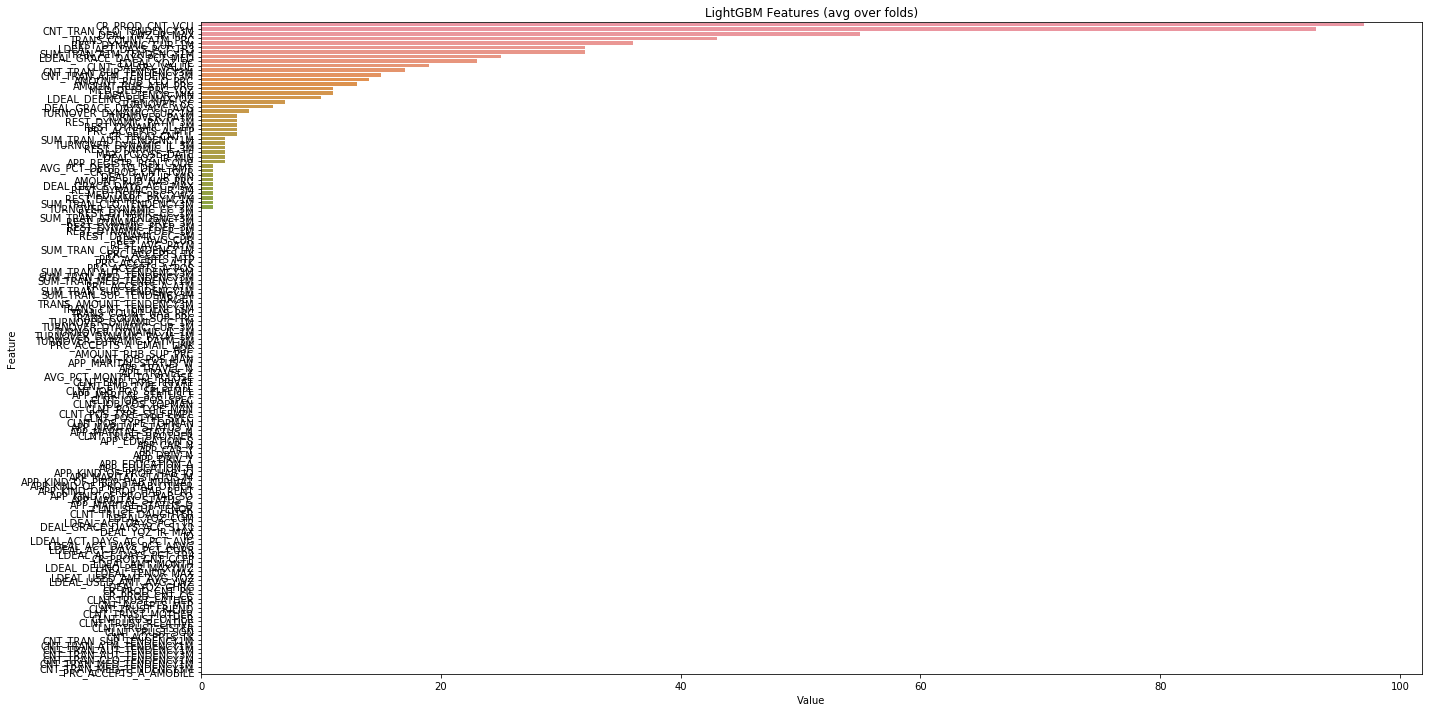

<Figure size 432x288 with 0 Axes>

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importance() , train_data.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

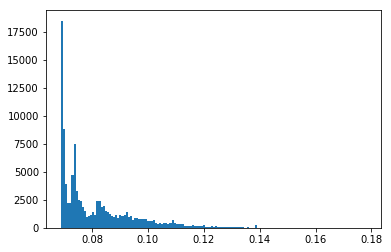

In [74]:
plt.hist(y_pred, bins='auto');

In [75]:
roc_auc_score(y_valid, y_pred)

0.814026078915628

In [54]:
roc_auc_score(y_valid, y_pred)

0.8121776702183134

## TEST

In [27]:
test_data = load_data(test_df)

In [28]:
X_test = test_data.drop(['ID'], axis=1).values
ids = test_data['ID'].values

In [29]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [30]:
fin_df = pd.DataFrame()
fin_df['id'] = ids
fin_df['target'] = y_pred

In [35]:
fin_df.to_csv('~/lab04s.csv', header=True, index=False, sep='\t')

# PART 3

In [2]:
import gc

import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt

from time import time
from random import choice
from scipy.stats import randint as sp_randint
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [48]:
def load_data(tmp):
    
    tmp = tmp.copy()
    
    tmp.dropna(axis=0, subset=['TARGET'], inplace=True)
    
    tmp['CLNT_TRUST_RELATION'] = tmp['CLNT_TRUST_RELATION'].str.lower()
    dict_rename_relations = {'друг': 'friend', 'мать': 'mother', 'близкий ро': 'relative', 'брат': 'brother', 
                             'отец': 'father', 'сестра': 'sister', 'дочь': 'daughter', 'сын': 'son',
                             'дальний ро': 'relative', 'муж': 'other', 'жена': 'other', 'мама': 'mother'}
    tmp['CLNT_TRUST_RELATION'] = tmp['CLNT_TRUST_RELATION'].replace(dict_rename_relations)
    dict_cat_relations = {'friend': 1, 'mother': 2, 'relative': 3, 'other': 4, 'brother': 5, 'sister': 6, 
                          'father': 7, 'daughter': 8,'son': 9,'NA': 0}
    tmp['CLNT_TRUST_RELATION_CAT'] = tmp['CLNT_TRUST_RELATION'].fillna('NA').map(dict_cat_relations)
    
    tmp['CLNT_TRUST_FRIEND'] = tmp['CLNT_TRUST_RELATION_CAT'].apply(lambda x: 1 if x == 1 else 0)
    tmp['CLNT_TRUST_MOTHER'] = tmp['CLNT_TRUST_RELATION_CAT'].apply(lambda x: 1 if x == 2 else 0)
    tmp['CLNT_TRUST_RELATIVE'] = tmp['CLNT_TRUST_RELATION_CAT'].apply(lambda x: 1 if x == 3 else 0)
    tmp['CLNT_TRUST_OTHER'] = tmp['CLNT_TRUST_RELATION_CAT'].apply(lambda x: 1 if x == 4 else 0)
    tmp['CLNT_TRUST_BROTHER'] = tmp['CLNT_TRUST_RELATION_CAT'].apply(lambda x: 1 if x == 5 else 0)
    tmp['CLNT_TRUST_SISTER'] = tmp['CLNT_TRUST_RELATION_CAT'].apply(lambda x: 1 if x == 6 else 0)
    tmp['CLNT_TRUST_FATHER'] = tmp['CLNT_TRUST_RELATION_CAT'].apply(lambda x: 1 if x == 7 else 0)
    tmp['CLNT_TRUST_DAUGHTER'] = tmp['CLNT_TRUST_RELATION_CAT'].apply(lambda x: 1 if x == 8 else 0)
    tmp['CLNT_TRUST_SON'] = tmp['CLNT_TRUST_RELATION_CAT'].apply(lambda x: 1 if x == 9 else 0)
    
    
    
    tmp['APP_MARITAL_STATUS'] = tmp['APP_MARITAL_STATUS'].str.lower()
    dict_cat_mar_stat = { 'm': 1, 'v': 2, 't': 3, 'd': 4, 'n': 5, 'w': 6, 'c': 7, 'NA': 0}
    tmp['APP_MARITAL_STATUS_CAT'] = tmp['APP_MARITAL_STATUS'].replace({' ': None}).fillna('NA').map(dict_cat_mar_stat)
    
    tmp['APP_MARITAL_STATUS_M'] = tmp['APP_MARITAL_STATUS_CAT'].apply(lambda x: 1 if x == 1 else 0)
    tmp['APP_MARITAL_STATUS_V'] = tmp['APP_MARITAL_STATUS_CAT'].apply(lambda x: 1 if x == 2 else 0)
    tmp['APP_MARITAL_STATUS_T'] = tmp['APP_MARITAL_STATUS_CAT'].apply(lambda x: 1 if x == 3 else 0)
    tmp['APP_MARITAL_STATUS_D'] = tmp['APP_MARITAL_STATUS_CAT'].apply(lambda x: 1 if x == 4 else 0)
    tmp['APP_MARITAL_STATUS_N'] = tmp['APP_MARITAL_STATUS_CAT'].apply(lambda x: 1 if x == 5 else 0)
    tmp['APP_MARITAL_STATUS_W'] = tmp['APP_MARITAL_STATUS_CAT'].apply(lambda x: 1 if x == 6 else 0)
    tmp['APP_MARITAL_STATUS_C'] = tmp['APP_MARITAL_STATUS_CAT'].apply(lambda x: 1 if x == 7 else 0)
    
    
    dict_cat_prob_hab = { 'SO': 1, 'JO': 2, 'OTHER': 3, 'RENT': 4, 'NPRIVAT': 5, 'NA': 0}
    tmp['APP_KIND_OF_PROP_HABITATION_CAT'] = tmp['APP_KIND_OF_PROP_HABITATION'].fillna('NA').map(dict_cat_prob_hab)
    
    tmp['APP_KIND_OF_PROP_HAB_SO'] = tmp['APP_KIND_OF_PROP_HABITATION_CAT'].apply(lambda x: 1 if x == 1 else 0)
    tmp['APP_KIND_OF_PROP_HAB_JO'] = tmp['APP_KIND_OF_PROP_HABITATION_CAT'].apply(lambda x: 1 if x == 2 else 0)
    tmp['APP_KIND_OF_PROP_HAB_OTHER'] = tmp['APP_KIND_OF_PROP_HABITATION_CAT'].apply(lambda x: 1 if x == 3 else 0)
    tmp['APP_KIND_OF_PROP_HAB_RENT'] = tmp['APP_KIND_OF_PROP_HABITATION_CAT'].apply(lambda x: 1 if x == 4 else 0)
    tmp['APP_KIND_OF_PROP_HAB_NPRIVAT'] = tmp['APP_KIND_OF_PROP_HABITATION_CAT'].apply(lambda x: 1 if x == 5 else 0)
    
    
    dict_cat_pos_type = { 'SPECIALIST': 1, 'MANAGER': 2, 'TOP_MANAGER': 3, 'SELF_EMPL': 4, 'NA': 0}
    tmp['CLNT_JOB_POSITION_TYPE_CAT'] = tmp['CLNT_JOB_POSITION_TYPE'].fillna('NA').map(dict_cat_pos_type)
    
    tmp['CLNT_JOB_POS_SPEC'] = tmp['CLNT_JOB_POSITION_TYPE_CAT'].apply(lambda x: 1 if x == 1 else 0)
    tmp['CLNT_JOB_POS_MAN'] = tmp['CLNT_JOB_POSITION_TYPE_CAT'].apply(lambda x: 1 if x == 2 else 0)
    tmp['CLNT_JOB_POS_TOPMAN'] = tmp['CLNT_JOB_POSITION_TYPE_CAT'].apply(lambda x: 1 if x == 3 else 0)
    tmp['CLNT_JOB_POS_SELFEMPL'] = tmp['CLNT_JOB_POSITION_TYPE_CAT'].apply(lambda x: 1 if x == 4 else 0)
    
    dict_ny = { 'N': 0, 'Y': 1, 'NA': -1}
    tmp['APP_DRIVING_LICENSE_CAT'] = tmp['APP_DRIVING_LICENSE'].fillna('NA').map(dict_ny)
    
    tmp['APP_DRIV_N'] = tmp['APP_DRIVING_LICENSE_CAT'].apply(lambda x: 1 if x == 0 else 0)
    tmp['APP_DRIV_Y'] = tmp['APP_DRIVING_LICENSE_CAT'].apply(lambda x: 1 if x == 1 else 0)
    
    
    tmp['APP_EDUCATION'] = tmp['APP_EDUCATION'].str.lower().str.strip()
    dict_cat_edu = {'h': 1, 's': 2, 'a': 3}
    tmp['APP_EDUCATION_CAT'] = tmp['APP_EDUCATION'].replace({'ss': 's', 'hh': 'h', 'uh': 'h', 
                                                            'hi': 'h', 'i': 'h', 'ac': 'a', 'av': 'a'}).map(dict_cat_edu).fillna(0)
    
    tmp['APP_EDUCATION_H'] = tmp['APP_EDUCATION_CAT'].apply(lambda x: 1 if x == 1 else 0)
    tmp['APP_EDUCATION_S'] = tmp['APP_EDUCATION_CAT'].apply(lambda x: 1 if x == 2 else 0)
    tmp['APP_EDUCATION_A'] = tmp['APP_EDUCATION_CAT'].apply(lambda x: 1 if x == 3 else 0)
    
    
    tmp['APP_TRAVEL_PASS_CAT'] = tmp['APP_TRAVEL_PASS'].fillna('NA').map(dict_ny)
    
    tmp['APP_TRAVEL_N'] = tmp['APP_TRAVEL_PASS_CAT'].apply(lambda x: 1 if x == 0 else 0)
    tmp['APP_TRAVEL_Y'] = tmp['APP_TRAVEL_PASS_CAT'].apply(lambda x: 1 if x == 1 else 0)
    
    
    tmp['APP_CAR_CAT'] = tmp['APP_CAR'].fillna('NA').map(dict_ny) 
    
    tmp['APP_CAR_N'] = tmp['APP_CAR_CAT'].apply(lambda x: 1 if x == 0 else 0)
    tmp['APP_CAR_Y'] = tmp['APP_CAR_CAT'].apply(lambda x: 1 if x == 1 else 0)
    
    
    tmp['APP_POSITION_TYPE_CAT'] = tmp['APP_POSITION_TYPE'].fillna('NA').map(dict_cat_pos_type)
    
    tmp['CLNT_POS_TYPE_SPEC'] = tmp['APP_POSITION_TYPE_CAT'].apply(lambda x: 1 if x == 1 else 0)
    tmp['CLNT_POS_TYPE_MAN'] = tmp['APP_POSITION_TYPE_CAT'].apply(lambda x: 1 if x == 2 else 0)
    tmp['CLNT_POS_TYPE_TOPMAN'] = tmp['APP_POSITION_TYPE_CAT'].apply(lambda x: 1 if x == 3 else 0)
    tmp['CLNT_POS_TYPE_SELFEMPL'] = tmp['APP_POSITION_TYPE_CAT'].apply(lambda x: 1 if x == 4 else 0)
    
    dict_emp_type = {'PRIVATE': 1, 'STATE': 2, 'INTER': 3, 'IP': 4, 'NA': 0}
    tmp['APP_EMP_TYPE_CAT'] = tmp['APP_EMP_TYPE'].fillna('NA').map(dict_emp_type)
    
    tmp['CLNT_EMP_TYPE_PRIVAT'] = tmp['APP_EMP_TYPE_CAT'].apply(lambda x: 1 if x == 1 else 0)
    tmp['CLNT_EMP_TYPE_STATE'] = tmp['APP_EMP_TYPE_CAT'].apply(lambda x: 1 if x == 2 else 0)
    tmp['CLNT_EMP_TYPE_PINTER'] = tmp['APP_EMP_TYPE_CAT'].apply(lambda x: 1 if x == 3 else 0)
    tmp['CLNT_EMP_TYPE_IP'] = tmp['APP_EMP_TYPE_CAT'].apply(lambda x: 1 if x == 4 else 0)
    
    
    dict_pack = {'102': 102, 'K01': 100, 'O01': 200, '105': 105, '107': 107, '103': 103, '104': 104, '301': 301,
                '101': 101, '109': 109, 'M01': 300, '108': 108, 'NA': 0}

    tmp['PACK_CAT'] = tmp['PACK'].fillna('NA').map(dict_pack)

    col_to_del = ['CLNT_TRUST_RELATION', 'APP_MARITAL_STATUS', 'APP_KIND_OF_PROP_HABITATION', 'CLNT_JOB_POSITION',
              'CLNT_JOB_POSITION_TYPE', 'APP_DRIVING_LICENSE', 'APP_EDUCATION', 'APP_TRAVEL_PASS',
              'APP_CAR', 'APP_POSITION_TYPE', 'APP_EMP_TYPE', 'APP_COMP_TYPE','PACK', 'Unnamed: 0',
                 
                 'CLNT_TRUST_RELATION_CAT', 'APP_MARITAL_STATUS_CAT', 'APP_KIND_OF_PROP_HABITATION_CAT', 
                 'CLNT_JOB_POSITION_TYPE_CAT', 'APP_DRIVING_LICENSE_CAT', 'APP_EDUCATION_CAT', 
               
                  'APP_TRAVEL_PASS_CAT', 'APP_CAR_CAT', 'APP_POSITION_TYPE_CAT', 
                  'APP_EMP_TYPE_CAT', 'PACK_CAT'
                 ]
    
    
    tmp.drop(col_to_del, axis=1, inplace=True)
    
    tmp = tmp.fillna(-1)
    
    return tmp

In [44]:
file_path = r'/data/share/lab04data'

train_df = pd.read_csv(file_path + '/lab04_train.csv', engine='python', encoding='utf8', na_values=['None', 'nan'])
test_df = pd.read_csv(file_path + '/lab04_test.csv', engine='python', encoding='utf8', na_values=['None', 'nan'])

In [49]:
train_data = load_data(train_df)
test_data = load_data(test_df)

KeyError: ['TARGET']

In [15]:
#train_data = train_df.drop(col_to_del, axis=1)
#test_data = test_df.drop(col_to_del, axis=1)

In [17]:
#train_data = train_data.fillna(-1)
#test_data = test_data.fillna(-1)

In [ ]:
train_data['REST_AVG_MULT_CUR_PAYM'] = train_data['REST_AVG_CUR'] * train_data['REST_AVG_PAYM']
train_data['REST_AVG_SUM_CUR_PAYM'] = train_data['REST_AVG_CUR'] + train_data['REST_AVG_PAYM']
train_data['REST_AVG_DEF_CUR_PAYM'] = train_data['REST_AVG_CUR'] - train_data['REST_AVG_PAYM']

In [ ]:
test_data['REST_AVG_MULT_CUR_PAYM'] = test_data['REST_AVG_CUR'] * test_data['REST_AVG_PAYM']
test_data['REST_AVG_SUM_CUR_PAYM'] = test_data['REST_AVG_CUR'] + test_data['REST_AVG_PAYM']
test_data['REST_AVG_DEF_CUR_PAYM'] = test_data['REST_AVG_CUR'] - test_data['REST_AVG_PAYM']

In [ ]:
X = train_data.drop(['TARGET','ID'], axis=1)
y = train_data['TARGET']

In [ ]:
train_data['TARGET'].value_counts()

In [22]:
n_iterations = 7 # number of iterations for random search
top_n = 5 # select top n parameter sets

In [23]:
roc_auc_mean = []
roc_auc_std = []
dict_list = []

In [24]:
param_dist = {'num_leaves': choice([27, 31, 61, 81, 127, 197, 231, 275, 302]),
              'bagging_fraction': choice([0.5, 0.7, 0.8, 0.9]),
              'learning_rate': choice([0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5]),
              'min_data': choice([300, 400, 450, 500, 550, 650]),
              'is_unbalance': choice([True, False]),
              'max_bin': choice([3, 5, 10, 12, 18, 20, 22]),
              'boosting_type' : choice(['gbdt', 'dart']),
              'bagging_freq': choice([3, 9, 11, 15, 17, 23, 31]),
              'max_depth': choice([3, 4, 5, 6, 7, 9, 11]),       
              'feature_fraction': choice([0.5, 0.7, 0.8, 0.9]),
              'lambda_l1': choice([0, 10, 20, 30, 40]),
              'objective': 'binary', 
              'metric': 'auc'} 

In [25]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

5

In [67]:
X_tt = test_data.drop(['ID'], axis=1)

In [27]:
y.value_counts()

0.0    294607
1.0     26156
Name: TARGET, dtype: int64

In [28]:
for i in range(0, n_iterations):
    skf_split = skf.split(X, y)
    param_dist = {'num_leaves': choice([27, 31, 61, 81, 127, 197, 231, 275, 302]),
              'bagging_fraction': choice([0.5, 0.7, 0.8, 0.9]),
              'learning_rate': choice([0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5]),
              'min_data': choice([300, 400, 450, 500, 550, 650]),
              'is_unbalance': choice([True, False]),
              'max_bin': choice([3, 5, 10, 12, 18, 20, 22]),
              'boosting_type' : choice(['gbdt', 'dart']),
              'bagging_freq': choice([3, 9, 11, 15, 17, 23, 31]),
              'max_depth': choice([3, 4, 5, 6, 7, 9, 11]),       
              'feature_fraction': choice([0.5, 0.7, 0.8, 0.9]),
              'lambda_l1': choice([0, 10, 20, 30, 40]),
              'objective': 'binary', 
              'metric': 'auc'} 
    
    #gini_norm = []
    roc_l = []
    
    print ("Cycle {}...".format(i+1))
    for train_index, test_index in skf_split:
    
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
    
        X_val = X.iloc[test_index]
        y_val = y.iloc[test_index]
    
        # training
        lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=True)
        lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train, free_raw_data=True)
    
        gbm = lgb.train(param_dist,
                        lgb_train,
                        num_boost_round = 10,
                        valid_sets = lgb_val,
                        early_stopping_rounds=5,
                        verbose_eval=5)
        # predicting
        y_pred = gbm.predict(X_val, num_iteration=gbm.best_iteration)
        #gn = gini_normalized(y_val, y_pred)
        #gini_norm.append(gn)
    
        roc = roc_auc_score(y_val, y_pred)
        roc_l.append(roc)

    #gini_norm_array = np.asarray(gini_norm)
    roc_array = np.asarray(roc_l)
    
    #gini_mean.append(gini_norm_array.mean())
    #gini_std.append(gini_norm_array.std())
    roc_auc_mean.append(roc_array.mean())
    roc_auc_std.append(roc_array.std())
    dict_list.append(param_dist)
    gc.collect()

Cycle 1...
Training until validation scores don't improve for 5 rounds.
[5]	valid_0's auc: 0.785606
[10]	valid_0's auc: 0.793174
Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.793174
Training until validation scores don't improve for 5 rounds.
[5]	valid_0's auc: 0.788261
[10]	valid_0's auc: 0.792287
Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.792287
Training until validation scores don't improve for 5 rounds.
[5]	valid_0's auc: 0.787467
[10]	valid_0's auc: 0.791831
Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.791831
Training until validation scores don't improve for 5 rounds.
[5]	valid_0's auc: 0.785651
[10]	valid_0's auc: 0.790885
Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.790885
Training until validation scores don't improve for 5 rounds.
[5]	valid_0's auc: 0.785566
[10]	valid_0's auc: 0.794097
Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.794097
Cycle 2...
Tra

In [31]:
results_pd = pd.DataFrame({"roc_auc_mean": roc_auc_mean,
                           "roc_auc_std": roc_auc_std,
                           "parameters": dict_list})

In [32]:
results_pd.sort_values("roc_auc_mean", ascending = False, axis = 0, inplace = True)

In [33]:
top_pd = results_pd.head(top_n)
for i in range(0, top_n):
    print ("Model with rank {}".format(i+1))
    print ("Mean roc_auc score %.5f (std: %.5f)" % (top_pd['roc_auc_mean'].values[i], top_pd['roc_auc_std'].values[i]))
    print ("Parameters:", top_pd['parameters'].values[i])
    print ("")

Model with rank 1
Mean roc_auc score 0.81100 (std: 0.00154)
Parameters: {'num_leaves': 61, 'bagging_fraction': 0.5, 'learning_rate': 0.05, 'min_data': 550, 'is_unbalance': True, 'max_bin': 18, 'boosting_type': 'gbdt', 'bagging_freq': 31, 'max_depth': 5, 'feature_fraction': 0.7, 'lambda_l1': 30, 'objective': 'binary', 'metric': 'auc', 'verbose': 1}

Model with rank 2
Mean roc_auc score 0.80896 (std: 0.00221)
Parameters: {'num_leaves': 81, 'bagging_fraction': 0.7, 'learning_rate': 0.05, 'min_data': 500, 'is_unbalance': False, 'max_bin': 20, 'boosting_type': 'gbdt', 'bagging_freq': 31, 'max_depth': 5, 'feature_fraction': 0.5, 'lambda_l1': 20, 'objective': 'binary', 'metric': 'auc', 'verbose': 1}

Model with rank 3
Mean roc_auc score 0.80111 (std: 0.00126)
Parameters: {'num_leaves': 197, 'bagging_fraction': 0.9, 'learning_rate': 0.01, 'min_data': 300, 'is_unbalance': False, 'max_bin': 22, 'boosting_type': 'dart', 'bagging_freq': 17, 'max_depth': 6, 'feature_fraction': 0.9, 'lambda_l1': 40,

In [34]:
prms_1 = top_pd['parameters'].values[0]
prms_2 = top_pd['parameters'].values[1]
prms_3 = top_pd['parameters'].values[2]
prms_4 = top_pd['parameters'].values[3]
prms_5 = top_pd['parameters'].values[4]

In [35]:
prms_list = [prms_1, prms_2, prms_3, prms_4, prms_5]
weights = [0.4, 0.4, 0.1, 0.05, 0.05]

In [36]:
pred_df = pd.DataFrame({"id": test_df['ID'].values})
target = np.zeros(test_df.shape[0])

In [37]:
lgb_s = lgb.Dataset(X, y)
for i in range(0, len(prms_list)):
    print ("Set {}".format(i))
    print ("training...")
    model = lgb.train(prms_list[i], 
                      lgb_s, 
                      num_boost_round = 10)
    print ("predicting...")
    y_pred = model.predict(X_tt)
    print ("arrays addition...")
    target = np.add(target, y_pred*weights[i])
    print ("done")
    print ("")
    gc.collect()
    
pred_df['target'] = target

Set 0
training...
predicting...
arrays addition...
done

Set 1
training...
predicting...
arrays addition...
done

Set 2
training...
predicting...
arrays addition...
done

Set 3
training...
predicting...
arrays addition...
done

Set 4
training...
predicting...
arrays addition...
done



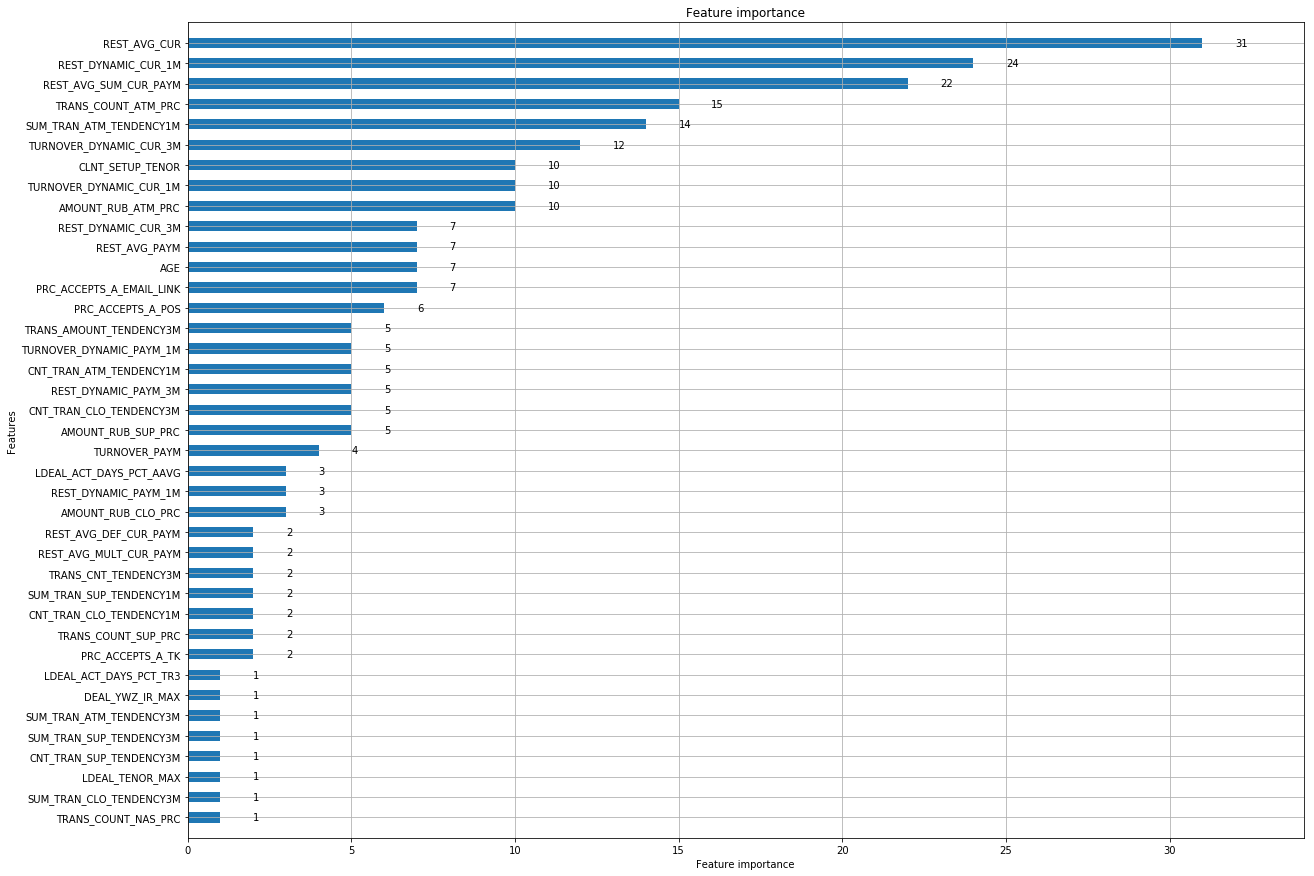

In [39]:
lgb.plot_importance(gbm, height=0.5, figsize=(20,15))
plt.show()

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [56]:
import xgboost as xgb

In [58]:
# read in data
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(X_valid, label=y_valid)
# specify parameters via map
param = {    'n_estimators': 100,
    'colsample_bytree': 0.8,
    'eval_metric': 'auc',
    'objective': 'binary:logistic',
    'max_depth': 7,
    'min_child_weight': 1,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'eta': 0.2}
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)

[22:35:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 252 extra nodes, 0 pruned nodes, max_depth=7
[22:35:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 246 extra nodes, 0 pruned nodes, max_depth=7


In [61]:
model = xgb.XGBClassifier(params=param)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       params={'n_estimators': 100, 'colsample_bytree': 0.8, 'eval_metric': 'auc', 'objective': 'binary:logistic', 'max_depth': 7, 'min_child_weight': 1, 'learning_rate': 0.1, 'subsample': 0.8, 'eta': 0.2},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [62]:
y_pred = model.predict_proba(X_valid)

In [64]:
y_pred

array([[0.9908839 , 0.00911609],
       [0.96837384, 0.03162619],
       [0.96682423, 0.03317577],
       ...,
       [0.82891387, 0.17108613],
       [0.9843538 , 0.0156462 ],
       [0.9474717 , 0.0525283 ]], dtype=float32)

In [65]:
roc = roc_auc_score(y_valid, y_pred[:,1])

In [66]:
roc

0.8301033644753137

In [68]:
y_pred = model.predict_proba(X_tt)

In [71]:
target = y_pred[:,1]
target

array([0.1065613 , 0.01242683, 0.00837164, ..., 0.1447805 , 0.07148883,
       0.12691014], dtype=float32)

In [72]:
pred_df = pd.DataFrame()

In [73]:
pred_df['id'] = test_data['ID']
pred_df['target'] = target

In [75]:
pred_df.to_csv('~/lab04s.csv', header=True, index=False, sep='\t')